In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet, Lars, SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings 
warnings.filterwarnings('ignore')

In [27]:
automobile_df = pd.read_csv('dataset/auto_mpg_processed.csv')
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
44,29.8,4,134.0,90,2711,15.5,41
390,21.5,4,121.0,110,2600,12.8,44
311,37.7,4,89.0,62,2050,17.3,40
281,23.5,6,173.0,110,2725,12.6,40
137,13.0,8,302.0,130,3870,15.0,45


In [34]:
featues = ['cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'age']
target = 'mpg'

In [35]:
result_dict = {}

In [36]:
def build_model(regression_fn, name_of_y_col,
                name_of_x_cols, dataset,
                test_frac = 0.2, preprocess_fn = None,
                show_plot_Y = False,
                show_plot_scatter = False):
    
    x = dataset[name_of_x_cols]
    y = dataset[name_of_y_col]
    
    if preprocess_fn is not None:
        x = preprocess_fn(x)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_frac)
    
    model = regression_fn(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print('Training Score: ', model.score(x_train, y_train))
    print('Test Score: ', r2_score(y_test, y_pred))
    
    if show_plot_Y == True:
        fig, ax = plt.subplots(figsize = (10, 6))
        
        plt.plot(y_pred, label = 'predicted')
        plt.plot(y_test.values,label = 'actual')
        
        plt.ylabel(name_of_y_col)
        
        plt.legend()
        
        
    if show_plot_scatter == True:
        
        plt.scatter(x_test, y_test)
        plt.plot(x_test, y_pred, 'r')
        
        plt.legend('Predicted Line', 'Observed Line')
        plt.show()
        
    return {
        'Training Score': model.score(x_train, y_train),
        'Test Score': r2_score(y_test, y_pred)
          }

In [45]:
def compare_results():
    for key in result_dict:
        print('Regression: ', key)
        print('Training Score: ', result_dict[key]['Training Score'])
        print('Test Score: ', result_dict[key]['Test Score'])
        print()

In [38]:
def linear_reg(x_train, y_train):
    model = LinearRegression(normalize = True)
    model.fit(x_train, y_train)
    
    return model

Training Score:  0.6943938917254657
Test Score:  0.684569564604439


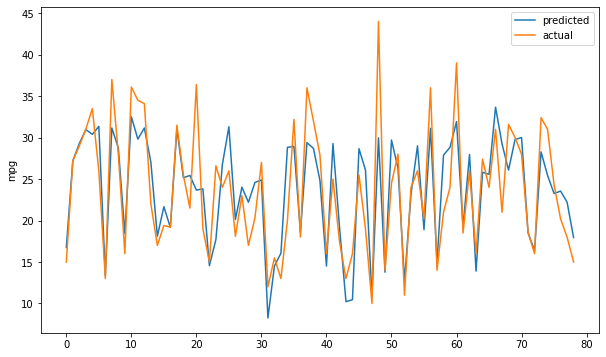

In [39]:
result_dict['mpg - Simple Linear'] = build_model(linear_reg, 'mpg', ['weight'], automobile_df, show_plot_Y = True)

Training Score:  0.8089199925917157
Test Score:  0.8034844341108531


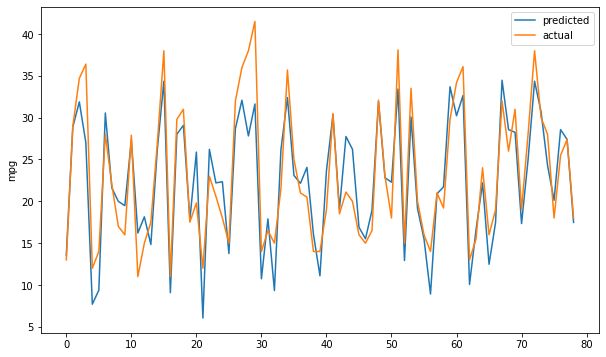

In [40]:
result_dict['mpg - Kitchen Sink Linear'] = build_model(linear_reg, 'mpg', featues, automobile_df, show_plot_Y = True)

Training Score:  0.7155460009813435
Test Score:  0.6570048729737947


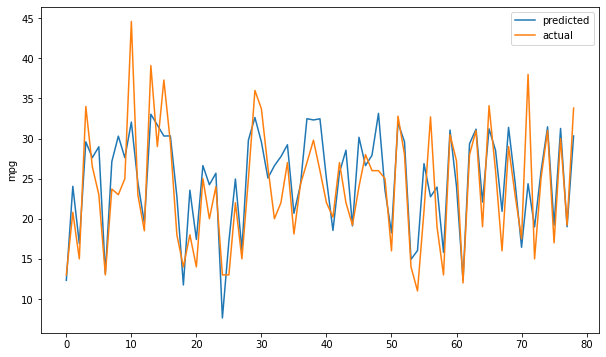

In [47]:
result_dict['mpg - Parsimonous Linear'] = build_model(linear_reg, 'mpg', ['horsepower','weight'],
                                                      automobile_df, show_plot_Y = True)

In [48]:
compare_results()

Regression:  mpg - Simple Linear
Training Score:  0.6943938917254657
Test Score:  0.684569564604439

Regression:  mpg - Kitchen Sink Linear
Training Score:  0.8089199925917157
Test Score:  0.8034844341108531

Regression:  mpg - Parsimonous Linear
Training Score:  0.7155460009813435
Test Score:  0.6570048729737947

